EDA output_steam_games

In [75]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
path_games=r"C:\Users\juanc.DESKTOP-LGMDQP1\OneDrive\Documentos\Proyecto Henry 01\Datos Limpios\output_games_clean.parquet"

In [3]:
df_games= pd.read_parquet(path_games)

In [4]:
df_games.head()

,id,app_name,developer,genres,price,release_date
0,761140,Lost Summoner Kitty,Kotoshiro,Action,4.99,2018
1,643980,Ironbound,Secret Level SRL,Indie,0.00,2018
2,670290,Real Pool 3D - Poolians,Poolians.com,Casual,0.00,2017
3,767400,弹炸人2222,彼岸领域,Action,0.99,2017
4,773570,Log Challenge,None,None,2.99,<NA>


In [5]:
# Contar los registros
num_registros = df_games.shape[0]
print("Número total de registros:", num_registros)


Número total de registros: 32135


In [80]:
#Nulos por columna
nulos_games= df_games.isnull().sum()
nulos_games

id                 2
app_name           2
developer       3299
genres          3283
price           1377
release_date    2352
dtype: int64

In [110]:
#Valores duplicados
duplicados_games= df_games.duplicated().sum()
print("Cantidad de duplicados:",duplicados_games)

Cantidad de duplicados: 1


In [97]:
#Tipo de datos por columna
tipos = df_games.dtypes

print("Tipos de datos por columna:")
print(tipos)


Tipos de datos por columna:
id                Int64
app_name         object
developer        object
genres           object
price           float64
release_date      Int64
dtype: object


In [111]:
# Precio máximo
precio_maximo = df_games['price'].max()

# Precio mínimo
precio_minimo = float('inf')  

#Precio minimo que no sea cero(free)
for i in df_games["price"]:
    if i < precio_minimo and i != 0:
        precio_minimo = i

# Precio promedio
precio_promedio = df_games['price'].mean()

print("Precio máximo:", precio_maximo)
print("Precio mínimo:", precio_minimo)
print("Precio promedio:", precio_promedio)


Precio máximo: 995.0
Precio mínimo: 0.49
Precio promedio: 8.866854802002731


In [7]:
#Total de juegos
tot_juegos = len(df_games['id'].unique())
print("Total de juegos unicos",tot_juegos)

Total de juegos unicos 32133


In [21]:
#Cantidad por género
genre_counts = pd.Series(df_games["genres"].value_counts())

# Calcular el porcentaje por género
genre_percentages = pd.Series(df_games["genres"].value_counts(normalize=True) * 100)

pd.DataFrame({"Cantidad": genre_counts, "Porcentaje": genre_percentages})


,Cantidad,Porcentaje
genres,,
Action,11319,39.231249
Casual,4340,15.042285
Adventure,4328,15.000693
Indie,3488,12.089283
Simulation,1886,6.536809
Strategy,1178,4.082906
RPG,706,2.446971
Racing,466,1.615139
Design &amp; Illustration,327,1.133370


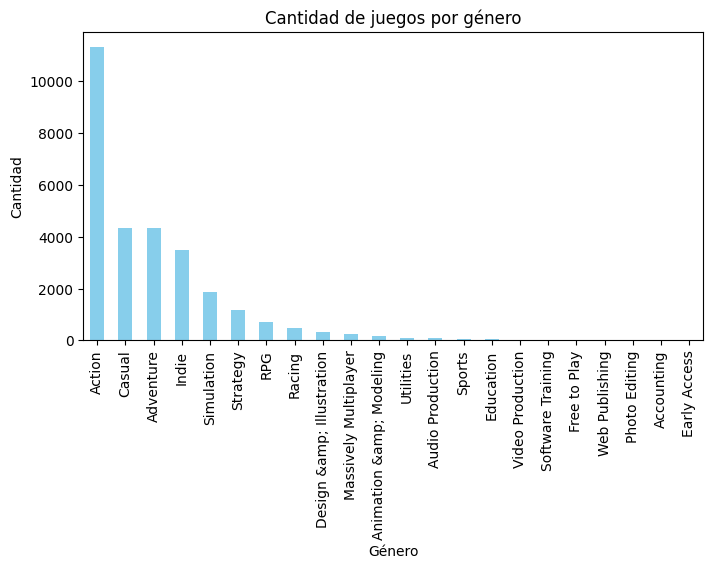

In [112]:
#Grafico de cantidad de juegos por genero
plt.figure(figsize=(8, 4))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de juegos por género')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Ubisoft - San Francisco'),
  Text(1, 0, 'SmiteWorks USA, LLC'),
  Text(2, 0, 'Dovetail Games'),
  Text(3, 0, 'KOEI TECMO GAMES CO., LTD.'),
  Text(4, 0, 'Paradox Development Studio'),
  Text(5, 0, 'Capcom'),
  Text(6, 0, 'Ronimo Games'),
  Text(7, 0, 'Choice of Games'),
  Text(8, 0, 'Musopia'),
  Text(9, 0, 'Stainless Games'),
  Text(10, 0, 'N3V Games'),
  Text(11, 0, 'Ubisoft Montreal'),
  Text(12, 0, 'Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)'),
  Text(13, 0, 'DL Softworks'),
  Text(14, 0, 'SCS Software'),
  Text(15, 0, 'Milestone S.r.l.'),
  Text(16, 0, 'Team NINJA,KOEI TECMO GAMES CO., LTD.'),
  Text(17, 0, 'Arc System Works'),
  Text(18, 0, 'Infinity Ward'),
  Text(19, 0, 'Rebellion')])

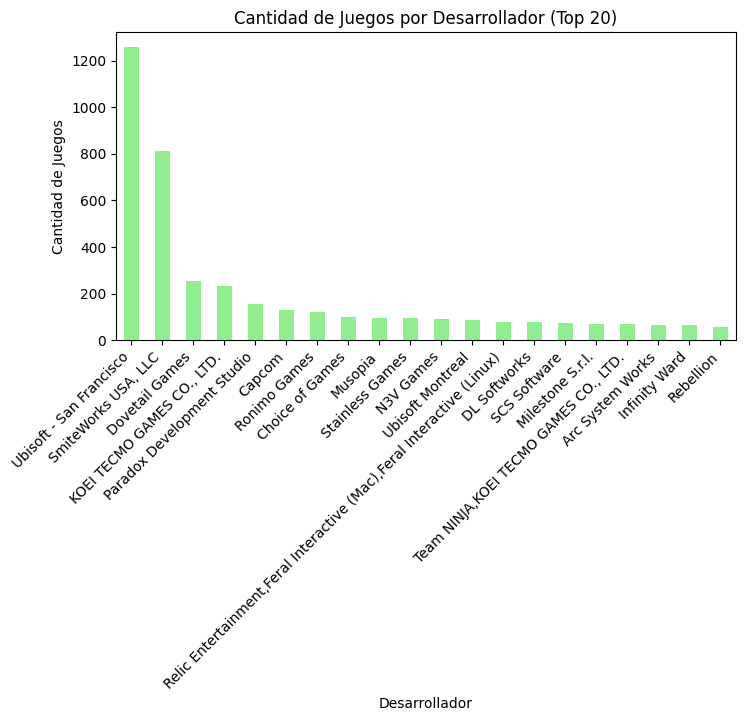

In [36]:
#Cantidad de juegos por desarrollador
developer_counts = df_games["developer"].value_counts().head(20)
# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
developer_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos por Desarrollador (Top 20)')
plt.xticks(rotation=45, ha='right')

EDA users_reviews

In [49]:
path_reviews= r"C:\Users\juanc.DESKTOP-LGMDQP1\OneDrive\Documentos\Proyecto Henry 01\Datos Limpios\users_reviews_clean.parquet"

In [106]:
df_reviews= pd.read_parquet(path_reviews)
df_reviews

,user_id,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,2
1,76561197970982479,22200,No ratings yet,True,2
2,76561197970982479,43110,No ratings yet,True,2
3,js41637,251610,75,True,2
4,js41637,227300,0,True,2
...,...,...,...,...,...
59328,76561198312638244,70,No ratings yet,True,2
59329,76561198312638244,362890,No ratings yet,True,2
59330,LydiaMorley,273110,50,True,2
59331,LydiaMorley,730,No ratings yet,True,2


In [54]:
#Cantidad de registros
n_registros = df_games.shape[0]
print("Numero total de registros:", n_registros)

Numero total de registros: 32135


In [98]:
#Valores nulos
null=df_reviews.isnull().sum()
null

user_id                0
item_id               28
helpful               28
recommend             28
sentiment_analysis     0
dtype: int64

In [113]:
#Valores duplicados
dup=df_reviews.duplicated().sum()
print("Cantidad de duplicados",dup)

Cantidad de duplicados 874


In [101]:
#Tipo de datos por columna
tip = df_reviews.dtypes

print("Tipos de datos por columna:")
print(tip)


Tipos de datos por columna:
user_id               object
item_id               object
helpful               object
recommend             object
sentiment_analysis     int64
dtype: object


In [114]:
# Cantidad y porcentaje de cada valor en la columna 'sentiment_analysis'
sentiment_counts = df_reviews['sentiment_analysis'].value_counts()
sentiment_porc = df_reviews['sentiment_analysis'].value_counts(normalize=True) * 100
sentiment_sum = pd.DataFrame({'Cantidad': sentiment_counts, 'Porcentaje': sentiment_porc})

sentiment_sum = sentiment_sum.sort_index()

sentiment_sum

,Cantidad,Porcentaje
sentiment_analysis,,
0,9612,16.200091
1,12304,20.737195
2,37417,63.062714


In [58]:
# Cantidad de usuarios que dieron su opinion
print("Usuarios que comentaron:" ,len(df_reviews['user_id'].unique()))

Usuarios que comentaron: 25485


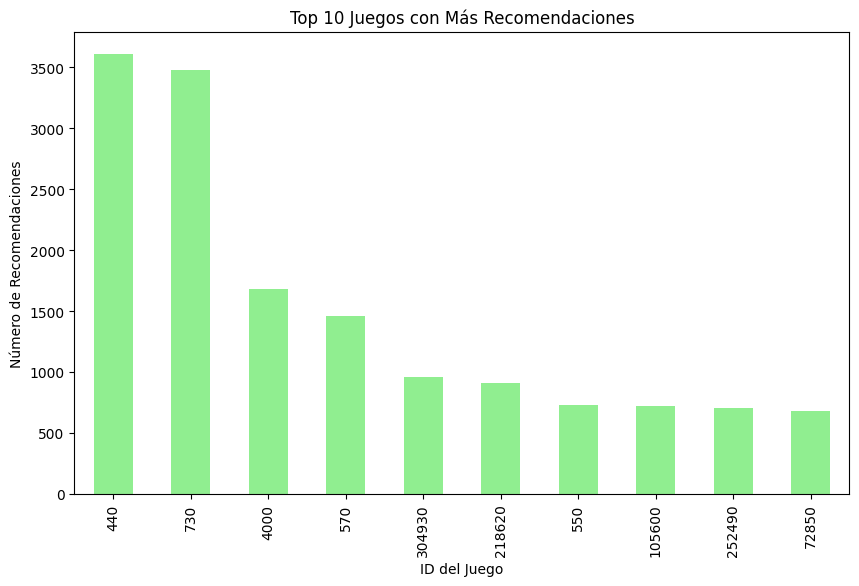

In [109]:
# Mostrar los 10 juegos mas recomendados
df_reviews['recommend'] = pd.to_numeric(df_reviews['recommend'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'recommend'
df = df_reviews.dropna(subset=['recommend'])

top_games = df.groupby('item_id')['recommend'].sum()

top_10_games = top_games.nlargest(10)


plt.figure(figsize=(10, 6))
top_10_games.plot(kind='bar', color='lightgreen')
plt.xlabel('ID del Juego')
plt.ylabel('Número de Recomendaciones')
plt.title('Top 10 Juegos con Más Recomendaciones')
plt.show()

EDA users_items

In [59]:
path_items= r"C:\Users\juanc.DESKTOP-LGMDQP1\OneDrive\Documentos\Proyecto Henry 01\Datos Limpios\users_items_clean.parquet"

In [60]:
df_items= pd.read_parquet(path_items)

In [65]:
df_items

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
1,76561197970982479,277,20,0.0
2,76561197970982479,277,30,7.0
3,76561197970982479,277,40,0.0
4,76561197970982479,277,50,0.0
...,...,...,...,...
5170010,76561198329548331,7,373330,0.0
5170011,76561198329548331,7,388490,3.0
5170012,76561198329548331,7,521570,4.0
5170013,76561198329548331,7,519140,3.0


In [64]:
#Cantidad de registros
print("Cantidad de registros:",df_items.shape[0])

Cantidad de registros: 5170015


In [102]:
#Valores nulos
nulo=df_items.isnull().sum()
nulo

user_id                 0
items_count             0
item_id             16806
playtime_forever    16806
dtype: int64

In [115]:
#Valores duplicados
dp=df_items.duplicated().sum()
print("Cantidad de duplicados:",dp)

Cantidad de duplicados: 59209


In [105]:
#Tipo de datos por columna
td=df_items.dtypes

print("Tipos de datos por columna:")
print(td)


Tipos de datos por columna:
user_id              object
items_count           int64
item_id              object
playtime_forever    float64
dtype: object


In [116]:
#tiempo mínimo, máximo, mediana y promedio de juego por usuario en horas
playtime_min = df_items['playtime_forever'].min()
playtime_max = df_items['playtime_forever'].max()
playtime_promedio = df_items['playtime_forever'].mean()
print("Maximo tiempo jugado:",playtime_max,"\n","Minimo tiempo jugado:",playtime_min,"\n","Tiempo jugado promedio:",playtime_promedio)

Maximo tiempo jugado: 642773.0 
 Minimo tiempo jugado: 0.0 
 Tiempo jugado promedio: 991.4951407947941


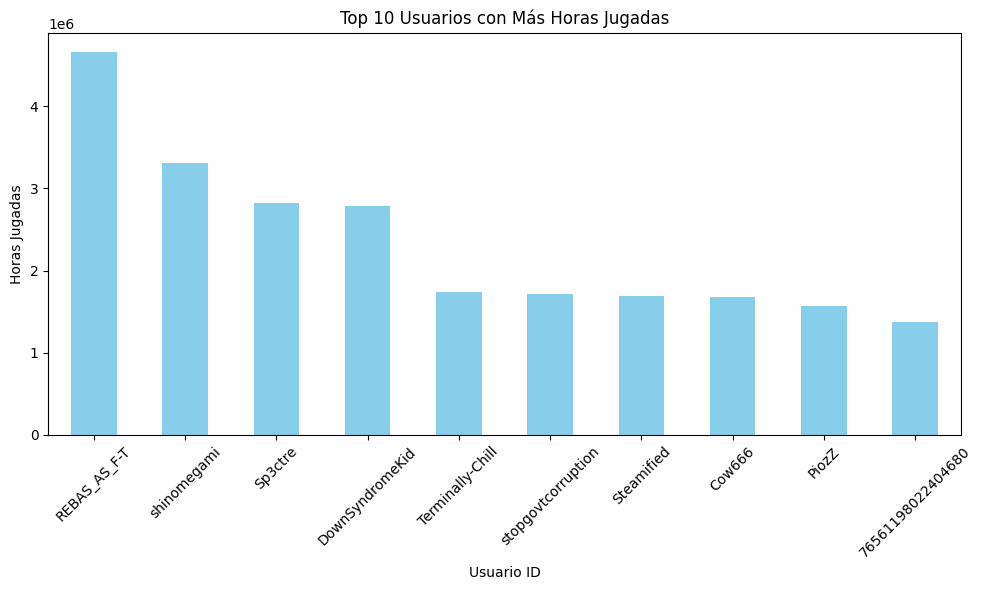

In [78]:
#10 Usuarios que acumulan mas horas de juegos
user_playtime = df_items.groupby('user_id')['playtime_forever'].sum()
top_10_users = user_playtime.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar', color='skyblue')
plt.xlabel('Usuario ID')
plt.ylabel('Horas Jugadas')
plt.title('Top 10 Usuarios con Más Horas Jugadas')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()